In [546]:
from statistics import LinearRegression

import pandas as pd

df = pd.read_csv('cars/bmw.csv')

In [547]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [548]:
# кол-во строк
len(df)

10781

# Обучающая и тестовая выборка (train and test)

In [549]:
from sklearn.model_selection import train_test_split

In [550]:
train, test = train_test_split(df, random_state=42)

In [551]:
len(train)

8085

In [552]:
len(test)

2696

In [553]:
len(train) + len(test)

10781

In [554]:
len(df)

10781

In [555]:
# считаем процент датасета который пошел в test
len(test) / len(df)

0.2500695668305352

# Анализ данных

In [556]:
# чекнем пропуски
train.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [557]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5
...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0


<Axes: >

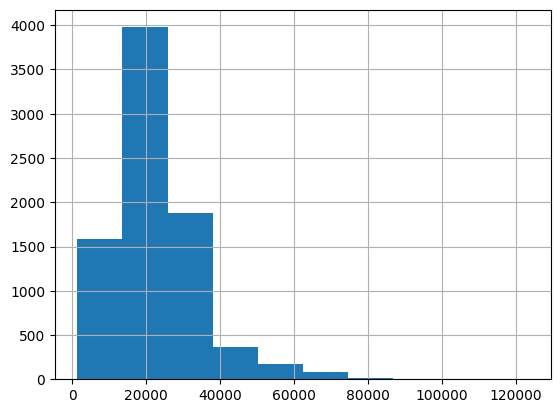

In [558]:
train['price'].hist()

In [559]:
# смотрим на цифры видим среднюю mean
train['price'].describe()
# видим медиану это 50% означает что у 50% выборки цена меньше чем 20 тысяч

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

In [560]:
# хотим понять взаимосвязь между годом и ценой и сделаем это при помощи Сводника - это самый главный инструмент аналитики датасайнтеста
# считаем среднее и медианное для каждого года
train.groupby('year')['price'].agg(['count', 'mean', 'median']) 

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


<Axes: xlabel='year'>

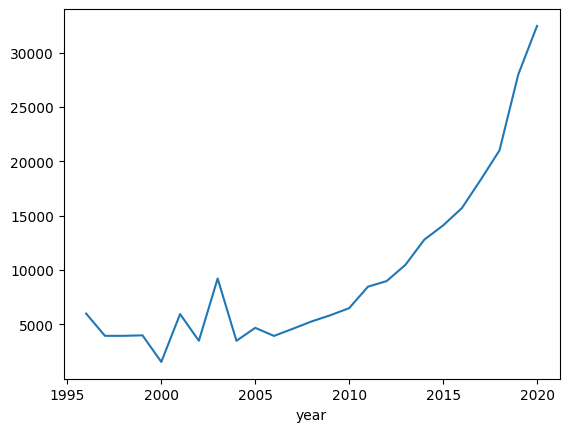

In [561]:
# смотрим на графике подверждается ли теория чем новее машина тем она дороже
train.groupby('year')['price'].median().plot() 

# Baseline

In [562]:
train['price'].describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

In [563]:
train['price_pred_mean'] = train['price'].mean()

In [564]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645
...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645


In [565]:
train['err'] = train['price_pred_mean'] - train['price']

In [566]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645
...,...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645


In [567]:
train['err_abs'] = abs(train['err'])

In [568]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645


In [569]:
# посмотрим на сколько в среднем ошибается наш константный алгоритм
train['err_abs'].mean()

np.float64(8450.556631461715)

In [570]:
# посчитаем абсолютную ошибку в процентах
train['err_abs_pct'] = train['err_abs'] / train['price']

In [571]:
train['err_abs_pct'].mean()
# в среднем ошибаюсь примерно на 47 процентов

np.float64(0.48316912602731443)

In [572]:
# проверим все те же расчеты только возьмем медиану и посмотрим будет ли лучше
train['price_pred_median'] = train['price'].median()

In [573]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0


In [574]:
# теперь проще и быстрее посчитаем ошибку
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [575]:
mean_absolute_error(train['price'], train['price_pred_mean']) # проверям и результат с train['err_abs'].mean() тот же

np.float64(8450.556631461715)

In [576]:
mean_absolute_percentage_error(train['price'], train['price_pred_mean']) # проверям и результат с train['err_abs_pct'].mean() тот же

np.float64(0.48316912602731443)

In [577]:
# теперь для медианы
mean_absolute_error(train['price'], train['price_pred_median'])

np.float64(8220.5146567718)

In [578]:
mean_absolute_percentage_error(train['price'], train['price_pred_median'])

np.float64(0.41711111879393314)

In [579]:
# посчитаем test
test['price_pred_median'] = train['price'].median() # считаем именно на трейне так как мы на этой выборке обучаемся

In [580]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0
...,...,...,...,...,...,...,...,...,...,...
9825,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,20022.0
3522,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,20022.0
9757,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,20022.0
6100,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,20022.0


In [581]:
# также считаем ошибку
mean_absolute_error(test['price'], test['price_pred_median'])

np.float64(8211.845697329376)

In [582]:
mean_absolute_percentage_error(test['price'], test['price_pred_median'])

np.float64(0.409212791738344)

# Алгоритм на основе года

In [583]:
# начинаем проверять что будет лучше работать средняя или медианная
train.groupby('year')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


In [584]:
model_year_mean = train.groupby('year')['price'].mean().reset_index() # reset_index() превращает в датафрейм и это уже алгоритм, если год такой то то цена такая то

In [585]:
# и теперь нам нужно прицепить к трейну или тесту тоесть сделать предсказание и тут мы можем приджоийнить эту таблицу по году к исходной таблице
# переименуем price
model_year_mean.columns

Index(['year', 'price'], dtype='object')

In [586]:
model_year_mean.columns = ['year', 'price_pred_year_mean']

In [587]:
model_year_mean

,year,price_pred_year_mean
0,1996,5995.000000
1,1997,3950.000000
2,1998,3950.000000
3,1999,3980.000000
4,2000,1550.000000
5,2001,7333.333333
6,2002,3893.500000
7,2003,9222.500000
8,2004,7932.857143
9,2005,5390.166667


In [588]:
# теперь приджойним к трейну
train = train.merge(model_year_mean, on='year', how='left') # джойним как лефт, но если были бы где-то пробелы в годе, то надо подумать возможно их восполнить

In [589]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222


In [590]:
# теперь считаем ошибку
mean_absolute_error(train['price'], train['price_pred_year_mean'])

np.float64(5474.243598515644)

In [591]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_mean'])
# видим очень сильное улучшение на трейне

np.float64(0.2447228468704618)

In [592]:
# теперь тоже самое на тесте
test = test.merge(model_year_mean, on='year', how='left')

In [593]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394
...,...,...,...,...,...,...,...,...,...,...,...
2691,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,20022.0,31066.986143
2692,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,20022.0,31066.986143
2693,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,20022.0,19205.839506
2694,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,20022.0,31066.986143


In [594]:
# проверяем нет ли пропусков, так как вдруг какие то года не попали
test.isna().mean()

model                   0.0
year                    0.0
price                   0.0
transmission            0.0
mileage                 0.0
fuelType                0.0
tax                     0.0
mpg                     0.0
engineSize              0.0
price_pred_median       0.0
price_pred_year_mean    0.0
dtype: float64

In [595]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394
...,...,...,...,...,...,...,...,...,...,...,...
2691,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,20022.0,31066.986143
2692,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,20022.0,31066.986143
2693,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,20022.0,19205.839506
2694,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,20022.0,31066.986143


In [596]:
# сравниваем качество на test
mean_absolute_error(test['price'], test['price_pred_year_mean'])

np.float64(5426.271071211102)

In [597]:
mean_absolute_percentage_error(test['price'], test['price_pred_year_mean'])

np.float64(0.23933940428873632)

# Медиана по году, новый алгоритм, где вместо среднего используем медиану

In [598]:
model_year_median = train.groupby('year')['price'].median().reset_index()
# можно еще по другому переименовать
model_year_median = model_year_median.rename({'price': 'price_pred_year_median'}, axis=1)

In [599]:
model_year_median

,year,price_pred_year_median
0,1996,5995.0
1,1997,3950.0
2,1998,3950.0
3,1999,3995.0
4,2000,1550.0
5,2001,5950.0
6,2002,3494.5
7,2003,9222.5
8,2004,3495.0
9,2005,4685.0


In [600]:
train = train.merge(model_year_median, on='year', how='left')

In [601]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394,21000.0
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222,15699.5
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143,27980.0
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222,15699.5


In [602]:
mean_absolute_error(train['price'], train['price_pred_year_median'])

np.float64(5232.327891156463)

In [603]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_median'])

np.float64(0.21723436816638503)

In [604]:
test = test.merge(model_year_median, on='year', how='left')
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2691,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,20022.0,31066.986143,27980.0
2692,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,20022.0,31066.986143,27980.0
2693,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,20022.0,19205.839506,18299.5
2694,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,20022.0,31066.986143,27980.0


In [605]:
mean_absolute_error(test['price'], test['price_pred_year_median'])

np.float64(5240.677299703264)

In [606]:
mean_absolute_percentage_error(test['price'], test['price_pred_year_median'])

np.float64(0.21478293590399475)

# Добавляем еще одну модель (предполагаем чем больше объем движка тем дороже машина)

In [607]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394,21000.0
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222,15699.5
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143,27980.0
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222,15699.5


In [608]:
train.groupby('engineSize')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
engineSize,,,
0.0,32,18469.906250,18250.0
0.6,6,17973.333333,18200.0
1.0,1,17400.000000,17400.0
1.5,1146,17104.345550,15881.5
1.6,75,9230.240000,8890.0
1.9,5,3968.000000,3950.0
2.0,4925,20697.721624,19792.0
2.2,4,6010.000000,3972.5
2.5,8,4532.375000,3892.5


In [609]:
# исходя из значений можно сделать группировку разбив на 3 категории
def engine_group(x):
    if x <= 1.5:
        return '<=1.5'
    if x <= 2.0:
        return '<=2.0'
    return '>2.0'

In [610]:
train['engine_group'] = train['engineSize'].apply(engine_group)

In [611]:
# делаем сводник
train.groupby('engine_group')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
engine_group,,,
<=1.5,1185,17145.870886,15980.0
<=2.0,5005,20509.168232,19499.0
>2.0,1895,31826.479683,27500.0


In [612]:
# сделаем проверку на контрольную сумму, что все строки есть и ничего не потерялось
t = train.groupby('engine_group')['price'].agg(['count', 'mean', 'median'])

In [613]:
t['count'].sum()

np.int64(8085)

In [614]:
len(train)

8085

In [615]:
# можно все тоже самое сделать и при помощи ката
train['engine_group2'] =  pd.cut(train['engineSize'], [-float('inf'), 1.5, 2.0, float('inf')])

In [616]:
train.groupby('engine_group2')['price'].agg(['count', 'mean', 'median'])

/tmp/ipykernel_380931/432005923.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('engine_group2')['price'].agg(['count', 'mean', 'median'])


,count,mean,median
engine_group2,,,
"(-inf, 1.5]",1185,17145.870886,15980.0
"(1.5, 2.0]",5005,20509.168232,19499.0
"(2.0, inf]",1895,31826.479683,27500.0


In [617]:
model_year_engine_median = train.groupby(['year', 'engine_group'])['price'].median().reset_index()

In [618]:
model_year_engine_median

,year,engine_group,price
0,1996,>2.0,5995.0
1,1997,<=2.0,3950.0
2,1998,<=2.0,3950.0
3,1999,<=2.0,3995.0
4,2000,>2.0,1550.0
5,2001,<=1.5,13000.0
6,2001,>2.0,4500.0
7,2002,<=2.0,3999.0
8,2002,>2.0,2990.0
9,2003,>2.0,9222.5


In [619]:
train.groupby(['year', 'engine_group'])['price'].agg(['count'])

count
year engine_group       
1996 >2.0              1
1997 <=2.0             1
1998 <=2.0             1
1999 <=2.0             3
2000 >2.0              1
2001 <=1.5             1
     >2.0              2
2002 <=2.0             1
     >2.0              3
2003 >2.0              2
2004 <=2.0             2
     >2.0              5
2005 <=2.0             3
     >2.0              3
2006 <=2.0             6
     >2.0              6
2007 <=2.0             7
     >2.0              5
2008 <=2.0            10
     >2.0              8
2009 <=2.0            15
     >2.0              7
2010 <=2.0            21
     >2.0             10
2011 <=2.0            28
     >2.0              9
2012 <=2.0            75
     >2.0             17
2013 <=2.0           211
     >2.0             42
2014 <=1.5             4
     <=2.0           290
     >2.0             90
2015 <=1.5            83
     <=2.0           453
     >2.0            180
2016 <=1.5           286
     <=2.0           816
     >2.0            296
2017 <=1.5           236
     <=2.0           732
     >2.0            328
2018 <=1.5           113
     <=2.0           375
     >2.0            147
2019 <=1.5           395
     <=2.0          1606
     >2.0            597
2020 <=1.5            67
     <=2.0           349
     >2.0            136

In [620]:
t = train.pivot_table(index='year', columns='engine_group', values='price', aggfunc='median')

In [621]:
# визуализируем с помощью хитмапа чтобы не ломать глаза
import seaborn as sns

<Axes: xlabel='engine_group', ylabel='year'>

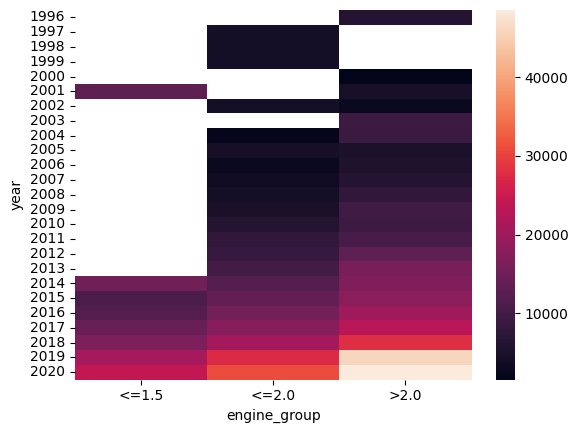

In [622]:
sns.heatmap(t) # и мы видим в нижней части тоесть чем ниже и правее чем темнее ячейки тем больше цена тоесть, значит модель работает

In [623]:
# теперь уже эту модель джойним к трейну и тесту и смотрим что получается
model_year_engine_median = model_year_engine_median.rename({'price': 'price_pred_year_engine_median'}, axis=1)

In [624]:
train = train.merge(model_year_engine_median, on=['year', 'engine_group'], how='left')

In [625]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,engine_group2,price_pred_year_engine_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2.0,"(1.5, 2.0]",9990.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,"(-inf, 1.5]",20980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2.0,"(2.0, inf]",18144.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2.0,"(1.5, 2.0]",27294.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,"(-inf, 1.5]",10999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394,21000.0,<=2.0,"(1.5, 2.0]",20750.0
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222,15699.5,>2.0,"(2.0, inf]",19996.5
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143,27980.0,<=2.0,"(1.5, 2.0]",27294.0
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222,15699.5,<=2.0,"(1.5, 2.0]",15500.0


In [626]:
mean_absolute_error(train['price'], train['price_pred_year_engine_median'])

np.float64(3659.774273345702)

In [627]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_engine_median'])

np.float64(0.1582922021242831)

In [628]:
test['engine_group'] = test['engineSize'].apply(engine_group)

In [629]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0,<=1.5
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5,<=2.0
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0,>2.0
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0,<=1.5
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0,<=1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,20022.0,31066.986143,27980.0,<=2.0
2692,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,20022.0,31066.986143,27980.0,>2.0
2693,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,20022.0,19205.839506,18299.5,<=2.0
2694,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,20022.0,31066.986143,27980.0,<=2.0


In [630]:
test = test.merge(model_year_engine_median, on=['year', 'engine_group'], how='left')

In [631]:
test.isna().mean()

model                            0.000000
year                             0.000000
price                            0.000000
transmission                     0.000000
mileage                          0.000000
fuelType                         0.000000
tax                              0.000000
mpg                              0.000000
engineSize                       0.000000
price_pred_median                0.000000
price_pred_year_mean             0.000000
price_pred_year_median           0.000000
engine_group                     0.000000
price_pred_year_engine_median    0.000742
dtype: float64

In [632]:
test[test['price_pred_year_engine_median'].isna()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median
415,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,20022.0,3980.0,3995.0,>2.0,NaN
2255,5 Series,2000,1699,Manual,99209,Petrol,265,29.4,2.0,20022.0,1550.0,1550.0,<=2.0,NaN


In [633]:
test_no_nan = test.dropna().copy()

In [634]:
# завернем проверку качества в вспомогательную функцию
def error(y_true, y_pred):
    print(mean_absolute_error(y_true, y_pred))
    print(mean_absolute_percentage_error(y_true, y_pred))

In [635]:
error(test_no_nan['price'], test_no_nan['price_pred_year_engine_median'])

3790.014291017075
0.16270961023342095


# Улучшение модели

In [636]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,engine_group2,price_pred_year_engine_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2.0,"(1.5, 2.0]",9990.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,"(-inf, 1.5]",20980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2.0,"(2.0, inf]",18144.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2.0,"(1.5, 2.0]",27294.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,"(-inf, 1.5]",10999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394,21000.0,<=2.0,"(1.5, 2.0]",20750.0
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222,15699.5,>2.0,"(2.0, inf]",19996.5
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143,27980.0,<=2.0,"(1.5, 2.0]",27294.0
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222,15699.5,<=2.0,"(1.5, 2.0]",15500.0


In [637]:
train.groupby(['transmission'])['price'].agg(['count', 'mean', 'median'])

,count,mean,median
transmission,,,
Automatic,2698,22413.452187,19392.0
Manual,1925,14557.851429,13450.0
Semi-Auto,3462,27377.835066,24990.0


In [638]:
len(model_year_engine_median) # показывает сколько условий в модели

51

In [639]:
model_year_engine_median # тут напрашивается решение сгрупировать года

,year,engine_group,price_pred_year_engine_median
0,1996,>2.0,5995.0
1,1997,<=2.0,3950.0
2,1998,<=2.0,3950.0
3,1999,<=2.0,3995.0
4,2000,>2.0,1550.0
5,2001,<=1.5,13000.0
6,2001,>2.0,4500.0
7,2002,<=2.0,3999.0
8,2002,>2.0,2990.0
9,2003,>2.0,9222.5


In [640]:
train.groupby(['year'])['price'].agg(['count', 'median'])

,count,median
year,,
1996,1,5995.0
1997,1,3950.0
1998,1,3950.0
1999,3,3995.0
2000,1,1550.0
2001,3,5950.0
2002,4,3494.5
2003,2,9222.5
2004,7,3495.0


In [641]:
train['year_group'] = pd.cut(train['year'], [0, 2010, 2012, 2014, 2016, 2018, float('inf')])

In [642]:
train.groupby(['year_group'])['price'].agg(['count', 'median'])

/tmp/ipykernel_380931/1671945229.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['year_group'])['price'].agg(['count', 'median'])


,count,median
year_group,,
"(0.0, 2010.0]",124,5584.0
"(2010.0, 2012.0]",129,8985.0
"(2012.0, 2014.0]",637,11695.0
"(2014.0, 2016.0]",2114,15080.5
"(2016.0, 2018.0]",1931,19370.0
"(2018.0, inf]",3150,28867.5


In [643]:
model_year_engine_group_median = train.groupby(['year_group', 'engine_group'])['price'].median().reset_index()

/tmp/ipykernel_380931/1929831595.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_year_engine_group_median = train.groupby(['year_group', 'engine_group'])['price'].median().reset_index()


In [644]:
model_year_engine_group_median

,year_group,engine_group,price
0,"(0.0, 2010.0]",<=1.5,13000.0
1,"(0.0, 2010.0]",<=2.0,4097.0
2,"(0.0, 2010.0]",>2.0,6990.0
3,"(2010.0, 2012.0]",<=1.5,NaN
4,"(2010.0, 2012.0]",<=2.0,8470.0
5,"(2010.0, 2012.0]",>2.0,12245.0
6,"(2012.0, 2014.0]",<=1.5,14972.5
7,"(2012.0, 2014.0]",<=2.0,10998.0
8,"(2012.0, 2014.0]",>2.0,16345.0
9,"(2014.0, 2016.0]",<=1.5,11557.0


In [645]:
model_year_engine_group_median = model_year_engine_group_median.rename({'price': 'price_pred_year_engine_group_median'}, axis=1)

In [646]:
train = train.merge(model_year_engine_group_median, on=['year_group', 'engine_group'], how='left')

In [647]:
error(train['price'], train['price_pred_year_engine_group_median'])

3827.4336425479282
0.1693848259731495


In [648]:
model_year_engine_trn_group_median = train.groupby(['year_group', 'engine_group', 'transmission'])['price'].median().reset_index()

/tmp/ipykernel_380931/4142543902.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_year_engine_trn_group_median = train.groupby(['year_group', 'engine_group', 'transmission'])['price'].median().reset_index()


In [649]:
model_year_engine_trn_group_median

,year_group,engine_group,transmission,price
0,"(0.0, 2010.0]",<=1.5,Automatic,NaN
1,"(0.0, 2010.0]",<=1.5,Manual,13000.0
2,"(0.0, 2010.0]",<=1.5,Semi-Auto,NaN
3,"(0.0, 2010.0]",<=2.0,Automatic,5982.5
4,"(0.0, 2010.0]",<=2.0,Manual,3995.0
5,"(0.0, 2010.0]",<=2.0,Semi-Auto,5695.0
6,"(0.0, 2010.0]",>2.0,Automatic,5997.0
7,"(0.0, 2010.0]",>2.0,Manual,8800.0
8,"(0.0, 2010.0]",>2.0,Semi-Auto,10995.0
9,"(2010.0, 2012.0]",<=1.5,Automatic,NaN


In [652]:
model_year_engine_trn_group_median = model_year_engine_trn_group_median.rename({'price': 'price_pred_year_engine_trn_group_median'}, axis=1)

In [655]:
train = train.merge(model_year_engine_trn_group_median, on=['year_group', 'engine_group', 'transmission'], how='left')

In [656]:
error(train['price'], train['price_pred_year_engine_trn_group_median'])

3635.5412492269634
0.1561691679065392


In [657]:
test['year_group'] = pd.cut(test['year'], [0, 2010, 2012, 2014, 2016, 2018, float('inf')])

In [658]:
test = test.merge(model_year_engine_trn_group_median, on=['year_group', 'engine_group', 'transmission'], how='left')

In [659]:
test.isna().mean()

model                                      0.000000
year                                       0.000000
price                                      0.000000
transmission                               0.000000
mileage                                    0.000000
fuelType                                   0.000000
tax                                        0.000000
mpg                                        0.000000
engineSize                                 0.000000
price_pred_median                          0.000000
price_pred_year_mean                       0.000000
price_pred_year_median                     0.000000
engine_group                               0.000000
price_pred_year_engine_median              0.000742
year_group                                 0.000000
price_pred_year_engine_trn_group_median    0.001113
dtype: float64

In [660]:
test_no_nan = test.dropna().copy()

In [661]:
error(test_no_nan['price'], test_no_nan['price_pred_year_engine_trn_group_median'])

3777.5172798216277
0.16037327734163415
